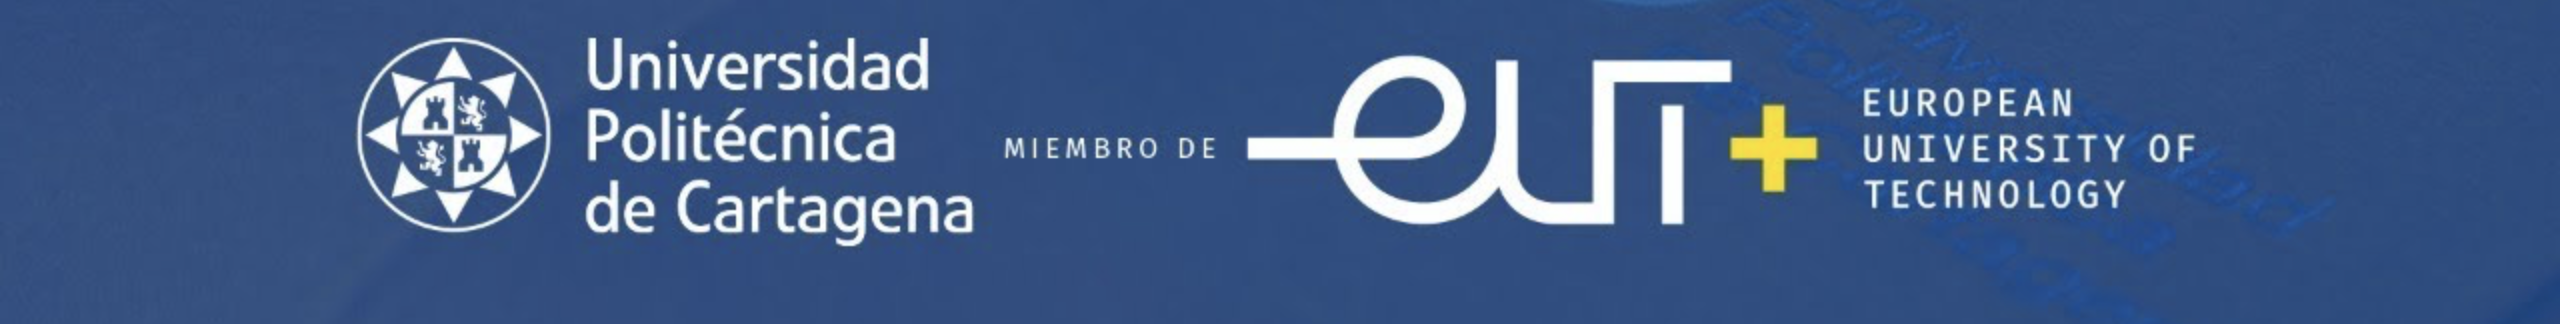
**MACHINE LEARNING II**

# PRÁCTICA 2. SESIÓN 1  
# DATOS SECUENCIALES Y MODELOS DE MARKOV 

Los objetivos de aprendizaje de esta práctica son:
1) Abordar de forma práctica la generación, procesamiento y análisis de datos secuenciales.
2) Explorar los modelos de Markov, incluyendo el cálculo de probabilidades de transición y la estimación de parámeros a partir de datos reales.
3) Desarrollar habilidades para visualizar cadenas de Markov y analizar secuencias temporales mediante herramientas matemáticas y estadísticas.
4) Aplicar modelos de Markov para realizar predicciones complejas y análisis de secuencias en diversos escenarios de la vida real.


Los datos secuenciales son aquéllos que tienen un orden temporal o espacial, y que pueden ser analizados como una sucesión de elementos. Por ejemplo, una serie temporal, un texto, el ADN, o una señal de audio, son datos secuenciales.

Las cadenas de Markov son un tipo de modelo probabilístico que se utiliza para describir sistemas que cambian de estado de forma aleatoria, dependiendo esta transición únicamente del estado en que nos encontramos y no de los anteriores. Por ejemplo, el clima, el comportamiento de un animal o el movimiento de un robot son sistemas que se pueden modelar mediante cadenas de Markov.


Antes de comenzar con la práctica, debemos importar una serie de librerías que faciliten el uso de las funciones objeto de estudio de la práctica. Para ello, en el siguiente cuadro, ejecuta los siguientes comandos:

- import numpy as np 
- import matplotlib.pyplot as plt
- import pandas as pd
- import networkx as nx 
- from scipy.stats import norm

Siendo las tres primeras ya bien conocidas, se pasará directamente a la explicación de las siguientes:

"Networkx" es una librería de Python para la creación, manipulación y estudio de estructuras dinámicas y funciones de grafos. Se usa fundamentalmente para representar redes. Un ejemplo de su uso sería:


In [1]:
import networkx as nx

# Crear un grafo vacío
G = nx.Graph()

# Añadir nodos
G.add_node(1)
G.add_node(2)

# Añadir una arista (enlace) entre los nodos 1 y 2
G.add_edge(1, 2)

# Mostrar los nodos y aristas
print("Nodos:", G.nodes())
print("Aristas:", G.edges())


Nodos: [1, 2]
Aristas: [(1, 2)]


Por otro lado, "scipy.stats" es un módulo que contiene una gran variedad de funciones estadísticas; en este caso, se usará una clase en concreto dentro de este módulo, llamada “norm” que, como su nombre indica, representa la distribución normal (o distribución gaussiana). Es posible utilizarla para calcular probabilidades, generar valores aleatorios, calcular funciones de densidad de probabilidad o funciones de distribución acumulativa, entre otras. Un ejemplo de su uso es el siguiente:



In [2]:
from scipy.stats import norm

# Calcular la probabilidad de que una variable aleatoria normal estándar sea menor que 1.96
probabilidad = norm.cdf(1.96)
print("Probabilidad de que Z < 1.96:", probabilidad)

# Calcular el valor de la función de densidad de probabilidad (PDF) en x = 0
pdf_value = norm.pdf(0)
print("Valor de la PDF en x = 0:", pdf_value)

# Generar 10 valores aleatorios de una distribución normal con media 0 y desviación estándar 1
random_values = norm.rvs(size=10)
print("Valores aleatorios:", random_values)

Probabilidad de que Z < 1.96: 0.9750021048517795
Valor de la PDF en x = 0: 0.3989422804014327
Valores aleatorios: [-0.58328355 -0.86489773 -1.09477421  0.46919375  0.32998723 -0.23930452
 -0.7884134   0.30958128 -1.12509826 -1.48297361]


Estas dos librerías nos serán de utilidad para numerosas aplicaciones de análisis de datos, estadística o aprendizaje máquina, entre otros.

In [3]:
# Importe las librerías necesarias (instálelas previamente si todavía no lo ha hecho)


                            EJERCICIO 1.1. GENERACIÓN DE DATOS SECUENCIALES CON PATRONES COMPLEJOS                                      

En este ejercicio será necesario llamar a la función “np” en varias ocasiones: para definir el espacio y los puntos que se van a usar (y posteriormente aleatorizarlos), así como para representar (preferiblemente) una función seno, todo ello con el tamaño adecuado.

Se comenzará con la generación de secuencias multimodales. Para ello, se va a modelar como sería el tiempo meteorológico a lo largo del año, mediante una serie de simulaciones. 
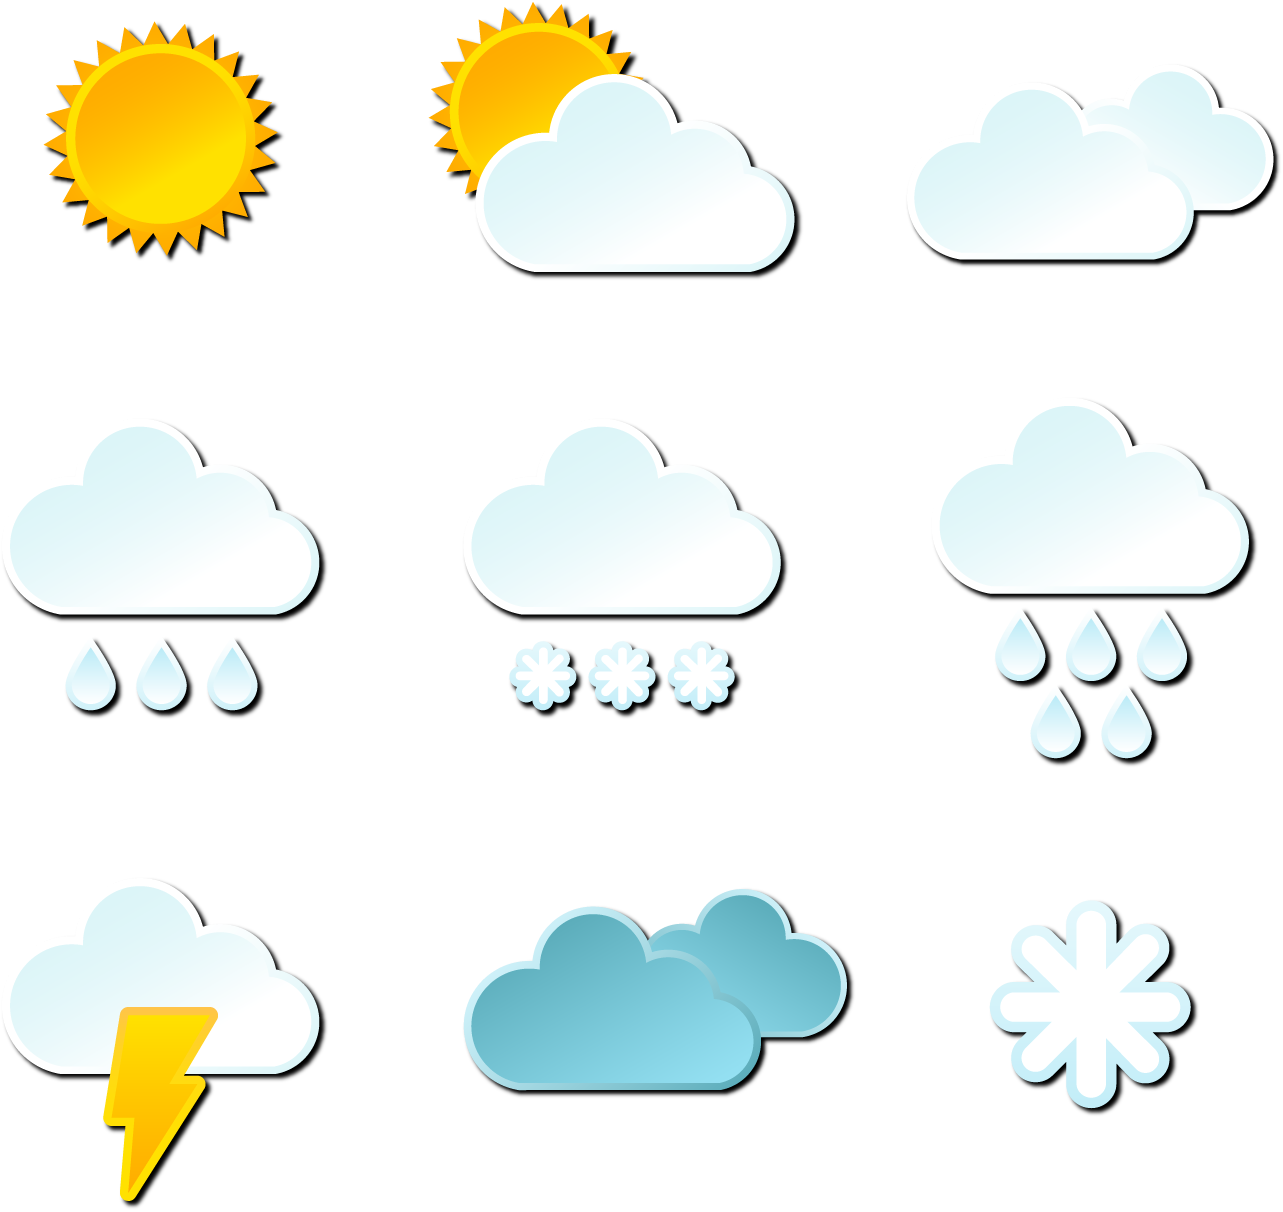

Para realizar lo indicado, se pide:
- Genere una secuencia de 365 puntos de datos que modele las temperaturas máximas diarias a lo largo del año, incorporando patrones estacionales mediante la combinación de señales sinusoidales y ruido gaussiano.


Una vez haya implementado lo anterior, será hora de visualizar el resultado: en el cuadro de código inferior, indique el código necesario para ello.

Adicionalmente, estudie los estadísticos media, varianza y autocorrelación. 

                                 EJERCICIO 1.2. PROCESAMIENTO DE DATOS SECUENCIALES                                            

Como se observa, la gráfica obtenida en el ejercicio anterior es ciertamente ruidosa. El objetivo de este ejercicio es normalizar los datos y "suavizar" su representación mediante filtros de ventana deslizante. 
- Aplique lo indicado para normalizar y suavizar la gráfica.
- Para el suavizado, utilice la función "np.convolve", consistiendo la respuesta al impulso del filtro en 25 valores consecutivos iguales a 1/25.
- Compare los resultados visualmente y discuta las diferencias antes y después de aplicar el suavizado.

Para normalizar la gráfica, la fórmula empleada será la siguiente:

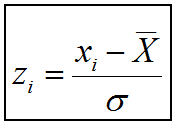

donde “z_i” es el resultado de la normalización, “x_i” el valor de cada punto en un instante determinado, “X” la media de los valores y “σ” corresponde a la desviación típica. Fácilmente calculable con “np.std”.

                            EJERCICIO 1.3. PROCESAMIENTO DE DATOS SECUENCIALES CON OUTLIERS                                                          

Para este ejercicio, suponga que en los datos generados anteriormente han existido una serie de anomalías con respecto a la medición de temperaturas. Aún desconociendo si el problema es humano o del propio ruido del medidor, se han obtenido algunos datos tan dispares como 60ºC o -20ºC (los cuales no son propios del sudeste de España, donde nos encontramos). Estos "picos" o valores anómalos se llaman "outliers", y son datos que difieren del rango esperado en una secuencia. Lo que se pretende con este ejercicio es lo siguiente:

- Cree un código que introduzca una serie de outliers aleatoramiente dentro del conjuno original de datos (asegúrese de que estos datos difieran notoramiente del rango esperado).
- Muestre en pantalla la gráfica obtenida.

OPCIONAL: Destaque en la gráfica, mediante "plot.scatter", los outliers.

Los outliers representan valores que difieren notablemente de los demás valores medidos, no es necesario que el alumno los introduzca manualmente, para ello, se usará “np.random.choice” con los valores preferidos (en este caso, -20ºC y 60ºC) que se irán esparciendo aleatoriamente a lo largo de los puntos establecidos. 
En el siguiente paso, deberá de corregir los outliers o errores, para ello, deberá de definir una función que sea capaz de detectar aquellos valores que superen superior o inferiormente a unos valores de temperatura “normales” en nuesta zona. Para ello, el código deberá empezar de la siguiente manera:


In [4]:
def imputar_outliers(temperaturas, lower_bound= 5, upper_bound=40):
    corrected_temperaturas = temperaturas.copy()
    for i in range(len(temperaturas)):
        if temperaturas[i] < lower_bound or temperaturas[i] > upper_bound:
            # Reemplazar outlier con la media de los vecinos no atípicos

SyntaxError: incomplete input (2830535598.py, line 5)

Por último, cuando estos outliers se hayan corregido, será conveniente mostrar por pantalla la gráfica resultante tras haber realizado el procesado.

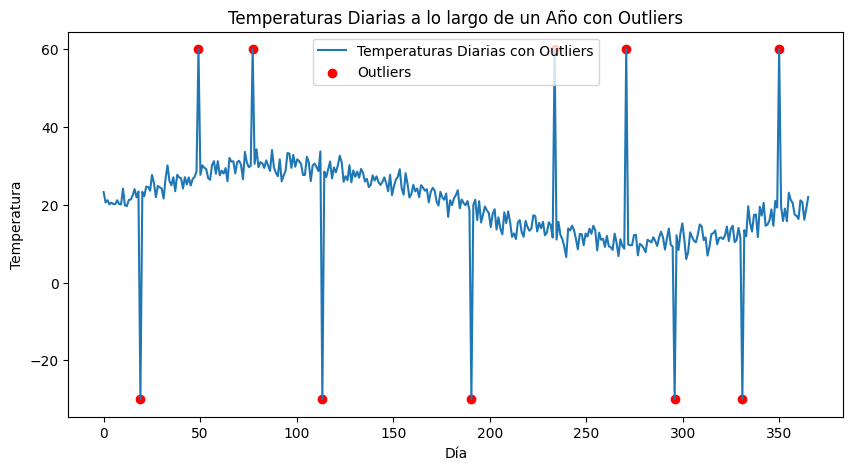

In [ ]:
# Implemente aquí el código con outliers


Si ha implementado correctamente el código, podrá observar cómo los outliers son claramente detectables ya que no se ajustan al comportamiento secuencial esperado. Aún así, para aclarar más este concepto, muestre por pantalla la normalización y suavizado de este nuevo registro de temperaturas.  

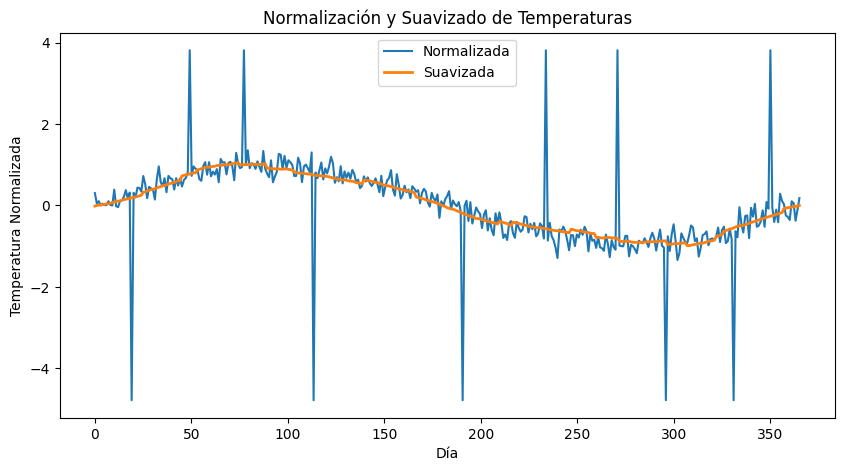

El siguiente paso sería, partiendo del conjunto de datos con outliers, intentar corregir las anomalías mediante el método de imputación por media (esto es, reemplazar los valores anómalos por la media de sus vecinos inmediatos). Para ello:

- Implemente el código necesario para ello.
- De nuevo, muestre la gráfica resultante.

NOTA: Considere que un valor será anómalo cuando éste supere los 40ºC o sea inferior a 5ºC.

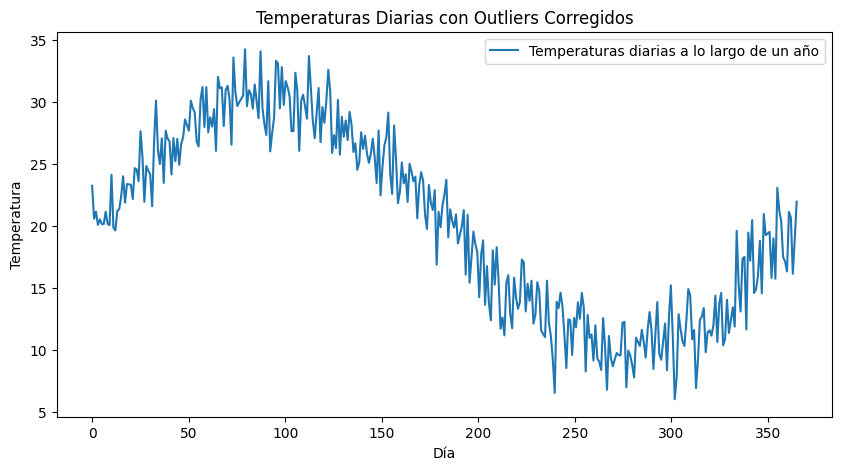

                                     EJERCICIO 1.4. MODELOS DE MARKOV DE PRIMER ORDEN                                                  

En esta parte de la práctica, se tiene como objetivo trabajar con los modelos de Markov de primer orden.
Se parte de un estudio de los posibles estados a lo largo de una ventana de observación, donde se obtuvo:

- Día 1: Soleado
- Día 2: Soleado
- Día 3: Nublado
- Día 4: Lluvioso
- Día 5: Lluvioso
- Día 6: Soleado
- Día 7: Soleado
- Día 8: Nublado
- Día 9: Nublado
- Día 10: Lluvioso
- Día 11: Lluvioso
- Día 12: Soleado
- Día 13: Soleado
- Día 14: Nublado

Se busca ahora la forma de establecer relaciones entre los estados meteorológicos teniendo en cuenta el estado actual y el anterior para determinar el próximo estado. Para ello, realice lo siguiente:

- Construya la matriz de transición: calcule la probabilidad de transición de un estado a otro basado en las frecuencias observadas.
- Intente predecir el tiempo para los 3 próximos días (sabiendo que hoy es soleado) a partir de la matriz de transición.

En este ejercicio será necesario seguir un orden específico y unas pautas necesarias, explicadas a continuación:

1) Definir el histórico de datos en el orden proporcionado.

2) Asignar un índice numérico a cada dato para la creación de un diccionario, teniendo en cuenta cada posible estado (el orden es indiferente pero tenga en cuenta que la matriz de transición será distinta según asigne los índices, para mayor uniformidad, siga el orden ‘Soleado’, ‘Nublado’, ‘Lluvioso’).

3) Para inicializar la matriz de transición, deberá de crear una matriz de ceros de tamaño N x N, donde “N” corresponde al número de estados posibles.

4) Cree un bucle que recorra el historial de tiempo y cuente cuántas veces ocurre cada transición de un estado a otro. Para poder asociar cada día con el siguiente, use “zip(historico,historico[1:])”.

5) Para poder convertir las cuentas de transiciones en probabilidades, será necesario normalizar; para ello, divida cada fila de la matriz por la suma de sus elementos.

6)	Por último, para crear la función que “prediga el tiempo", debe de usar la matriz de transición, empezando en un estado inicial y seleccionando el siguiente estado basado en las probabilidades en la fila correspondiente: "def predecir_tiempo(matriz_transicion, estado_inicial, dias)".

In [8]:
import numpy as np

# 1) Definir el histórico de datos
historico = ['Soleado', 'Soleado', 'Nublado', 'Lluvioso', 'Lluvioso', 'Soleado', 
             'Soleado', 'Nublado', 'Nublado', 'Lluvioso', 'Lluvioso', 'Soleado', 
             'Soleado', 'Nublado']

# 2) Asignar un índice numérico a cada estado
estados = ['Soleado', 'Nublado', 'Lluvioso']
estado_a_indice = {estado: i for i, estado in enumerate(estados)}
indice_a_estados = {i: estado for i, estado in enumerate(estados)}

print("Mapa de estados")
print(estado_a_indice)
print()

# 3) Inicializar la matriz de transición (N x N donde N = número de estados posibles)
n_estados = len(estados)
matriz_transicion = np.zeros((n_estados, n_estados))

print(f"Matriz de transción inicial: ({n_estados}x{n_estados}):")
print(matriz_transicion)
print()

# 4) Contar la transiciones usando zip(historico,historico[1:])
print("Contando transiciones:")
for estado_actual, estado_siguiente in zip(historico, historico[1:]):
    i = estado_a_indice[estado_actual]
    j = estado_a_indice[estado_siguiente]
    matriz_transicion[i, j] += 1
    print(f"{estado_actual} -> {estado_siguiente}: posición [{i},{j}]")

print("\nMatriz de conteos:")
print(matriz_transicion)
print()

# 5) Nomralizar para convertir conteos en probabilidades
for i in range(n_estados):
    sum_fila = np.sum(matriz_transicion[i, :])
    if sum_fila > 0:
        matriz_transicion[i, :] /= sum_fila

print("Matriz de transición normalizada")
print(matriz_transicion)
print()

# 6) Función para preddecir el tiempo
def predecir_tiempo(matriz_transicion, estado_inicial, dias):
    predicciones = []
    estado_actual = estado_inicial

    for dia in range(dias):
        # Obtener el índice del estado actual
        indice_actual = estado_a_indice[estado_actual]

        # Obtener probabilidades de transición
        probabilidades = matriz_transicion[indice_actual, :]

        # Seleccionar el siguiente estado con mayor probabilidad
        indice_siguiente = np.argmax(probabilidades)
        estado_siguiente = indice_a_estados[indice_siguiente]

        predicciones.append({
            'dia': dia + 1,
            'estado_predicho': estado_siguiente,
            'probabilidad': probabilidades[indice_siguiente]
        })

        # Actualizar estado actual para la siguiente iteración
        estado_actual = estado_siguiente
    
    return predicciones

# Predecir el tiempo para los próximos 3 días (sabiendo que hoy es soleado)
estado_inicial = "Soleado"
predicciones = predecir_tiempo(matriz_transicion, estado_inicial, 3)

print(f"Predicción del tiempo para los próximos 3 días (estado inicial: {estado_inicial}):")
for pred in predicciones:
    print(f"Día {pred['dia']}: {pred['estado_predicho']} (probabilidad: {pred['probabilidad']:.3f})")


Mapa de estados
{'Soleado': 0, 'Nublado': 1, 'Lluvioso': 2}

Matriz de transción inicial: (3x3):
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Contando transiciones:
Soleado -> Soleado: posición [0,0]
Soleado -> Nublado: posición [0,1]
Nublado -> Lluvioso: posición [1,2]
Lluvioso -> Lluvioso: posición [2,2]
Lluvioso -> Soleado: posición [2,0]
Soleado -> Soleado: posición [0,0]
Soleado -> Nublado: posición [0,1]
Nublado -> Nublado: posición [1,1]
Nublado -> Lluvioso: posición [1,2]
Lluvioso -> Lluvioso: posición [2,2]
Lluvioso -> Soleado: posición [2,0]
Soleado -> Soleado: posición [0,0]
Soleado -> Nublado: posición [0,1]

Matriz de conteos:
[[3. 3. 0.]
 [0. 1. 2.]
 [2. 0. 2.]]

Matriz de transición normalizada
[[0.5        0.5        0.        ]
 [0.         0.33333333 0.66666667]
 [0.5        0.         0.5       ]]

Predicción del tiempo para los próximos 3 días (estado inicial: Soleado):
Día 1: Soleado (probabilidad: 0.500)
Día 2: Soleado (probabilidad: 0.500)
Día 3: Soleado (probabilidad: 

Alternativamente, podríamos haber hecho uso de la librería "hmmlearn", que aunque está diseñada para trabajar con modelos de Markov ocultos (HMM), se le puede "engañar" para que funcione con modelos de Markov "estándar", ignorando los estados ocultos. En este apartado, deberá reproducir el ejercicio propuesto anteriormente pero, esta vez, haciendo uso de dicha librería.

Los pasos por seguir serán los siguientes:

1)	Definir los datos del histórico y proporcionarles un índice correspondiente.

2)	Convertir la secuencia de estados en una secuencia de índices usando el diccionario anterior.

3)	Convertir la secuencia de índices en un "np.array" y formatear de manera adecuada con “reshape” para que pueda ser utilizado por "hmmlearn".

4)	Crear un modelo de Markov de primer orden con “n_componentes” igual al número de estados. Será necesario configurar algunos parámetros del modelo: “n_iter”, número máximo de iteraciones para el algoritmo de ajuste; “tol”, tolerancia para la convergencia; “init_params”, parámetros que no se inicializarán automáticamente. El código sería el siguiente:


In [ ]:
# Crear y configurar el modelo de Markov de primer orden
model = hmm.MultinomialHMM(n_components=len(estados), n_iter=100, tol=0.01, init_params="")

5)	Seguidamente, se inicializará la matriz de transición con todo a cero, y las probabilidades iniciales de cada estado.

6)	Contar transiciones y normalizar.

7)	Inicializar la matriz de emisión. Como en este caso no se está trabajando con modelos ocultos, cada estado solo “emite a sí mismo”. Para ello, se deberá usar:


In [ ]:
# Inicializar la matriz de emisión como una matriz de identidad
# ya que en este caso cada estado solo se "emite" a sí mismo.
model.emissionprob_ = np.eye(len(estados))


8)	Una vez completado todo lo anterior, muestre por pantalla la matriz de transición.

*1) IMPORTE LA LIBERÍA*

In [9]:
from hmmlearn import hmm

*2) REHAGA EL CÓDIGO ANTERIOR USANDO LA LIBERÍA MENCIONADA* 

*(Para comprobar que el código es correcto, muestre por pantalla la matriz de emisión)*

In [17]:
secuencia_indices = [estado_a_indice[estado] for estado in historico]
print(f"Secuencia de índices: {secuencia_indices}")
print()

# Convertir la secuencia de índices en un np.array y formatear con reshape
X = np.array(secuencia_indices).reshape(-1, 1)
print("Formato de datos para hmmlearn:")
print(f"Shape: {X.shape}")
print(f"Datos:\n{X}")
print()

# Crear y configurar el modelo de Markov de primer orden
model = hmm.MultinomialHMM(n_components=len(estados), n_iter=100, tol=0.01, init_params="")

# Inicializar la matriz de transición con ceros y las probabilidades iniciales
model.transmat_ = np.zeros((len(estados), len(estados)))
model.startprob_ = np.ones(len(estados)) / len(estados)  # Probabilidades iniciales uniformes

# Contar transiciones y normalizar
print("Contando transiciones...")
for estado_actual, estado_siguiente in zip(historico, historico[1:]):
    i = estado_a_indice[estado_actual]
    j = estado_a_indice[estado_siguiente]
    model.transmat_[i, j] += 1
    print(f"{estado_actual} -> {estado_siguiente}: [{i},{j}]")

print("\nMatriz de conteos:")
print(model.transmat_)

# Normalizar filas para obtener probabilidades
for i in range(len(estados)):
    suma_fila = np.sum(model.transmat_[i, :])
    if suma_fila > 0:
        model.transmat_[i, :] = model.transmat_[i, :] / suma_fila

print("\nMatriz de transición normalizada:")
print(model.transmat_)
print()

# Inicializar la matriz de emisión como una matriz de identidad
# ya que en este caso cada estado solo se "emite" a sí mismo.
model.emissionprob_ = np.eye(len(estados))

# Mostrar por pantalla la matriz de transición
print("MATRIZ DE TRANSICIÓN:")
print("      ", "  ".join(f"{estado:8}" for estado in estados))
for i, estado in enumerate(estados):
    fila = "  ".join(f"{prob:8.3f}" for prob in model.transmat_[i, :])
    print(f"{estado:8} {fila}")
print()

# Mostrar la matriz de emisión para verificar que es correcta
print("MATRIZ DE EMISIÓN:")
print("      ", "  ".join(f"{estado:8}" for estado in estados))
for i, estado in enumerate(estados):
    fila = "  ".join(f"{prob:8.3f}" for prob in model.emissionprob_[i, :])
    print(f"{estado:8} {fila}")
print()

# Verificar que el modelo está configurado correctamente
print("Probabilidades iniciales:", model.startprob_)
print("Forma de la matriz de transición:", model.transmat_.shape)
print("Forma de la matriz de emisión:", model.emissionprob_.shape)

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Secuencia de índices: [0, 0, 1, 2, 2, 0, 0, 1, 1, 2, 2, 0, 0, 1]

Formato de datos para hmmlearn:
Shape: (14, 1)
Datos:
[[0]
 [0]
 [1]
 [2]
 [2]
 [0]
 [0]
 [1]
 [1]
 [2]
 [2]
 [0]
 [0]
 [1]]

Contando transiciones...
Soleado -> Soleado: [0,0]
Soleado -> Nublado: [0,1]
Nublado -> Lluvioso: [1,2]
Lluvioso -> Lluvioso: [2,2]
Lluvioso -> Soleado: [2,0]
Soleado -> Soleado: [0,0]
Soleado -> Nublado: [0,1]
Nublado -> Nublado: [1,1]
Nublado -> Lluvioso: [1,2]
Lluvioso -> Lluvioso: [2,2]
Lluvioso -> Soleado: [2,0]
Soleado -> Soleado: [0,0]
Soleado -> Nublado: [0,1]

Matriz de conteos:
[[3. 3. 0.]
 [0. 1. 2.]
 [2. 0. 2.]]

Matriz de transición normalizada:
[[0.5        0.5        0.        ]
 [0.         0.33333333 0.66666667]
 [0.5        0.         0.5       ]]

MATRIZ DE TRANSICIÓN:
       Soleado   Nublado   Lluvioso
Soleado     0.500     0.500     0.000
Nublado     0.000     0.333     0.667
Lluvioso    0.500     0.000     0.500

MATRIZ DE EMISIÓN:
       Soleado   Nublado   Lluvioso
Soleado

Llegados a este punto, responda a las siguientes preguntas:

- Si hoy está nublado, ¿cuál es la probabilidad de que mañana haya nubes pero los dos días siguientes sean soleados?

Para responder a esta cuestion, cree una función que calcule la probabilidad de una secuencia de estados y llámela "calcular_probabilidad_secuencia". Dicha función tomará como argumentos "estado_inicial", "secuencia" y "matriz_transicion".

In [18]:
def calcular_probabilidad_secuencia(estado_inicial, secuencia, matriz_transicion):
    """
    Calcula la probabilidad de una secuencia de estados dado un estado inicial
    
    Args:
        estado_inicial: Estado desde el cual comenzar
        secuencia: Lista de estados a seguir
        matriz_transicion: Matriz de probabilidades de transición
    
    Returns:
        probabilidad: Probabilidad total de la secuencia
    """
    # Obtener el índice del estado inicial
    estado_actual = estado_inicial
    probabilidad_total = 1.0
    
    print(f"Calculando probabilidad de la secuencia: {estado_inicial} -> {' -> '.join(secuencia)}")
    print(f"Estado inicial: {estado_inicial}")
    
    # Recorrer cada estado en la secuencia
    for i, estado_siguiente in enumerate(secuencia):
        # Obtener índices
        indice_actual = estado_a_indice[estado_actual]
        indice_siguiente = estado_a_indice[estado_siguiente]
        
        # Obtener probabilidad de transición
        prob_transicion = matriz_transicion[indice_actual, indice_siguiente]
        
        print(f"Paso {i+1}: {estado_actual} -> {estado_siguiente}: P = {prob_transicion:.4f}")
        
        # Multiplicar por la probabilidad total
        probabilidad_total *= prob_transicion
        
        # Actualizar estado actual
        estado_actual = estado_siguiente
    
    print(f"Probabilidad total: {probabilidad_total:.4f}")
    return probabilidad_total

# Responder a la pregunta:
# Si hoy está nublado, ¿cuál es la probabilidad de que mañana haya nubes 
# pero los dos días siguientes sean soleados?

estado_inicial = "Nublado"
secuencia_deseada = ["Nublado", "Soleado", "Soleado"]

print("=" * 60)
print("PREGUNTA: Si hoy está nublado, ¿cuál es la probabilidad de que")
print("mañana haya nubes pero los dos días siguientes sean soleados?")
print("=" * 60)

probabilidad = calcular_probabilidad_secuencia(estado_inicial, secuencia_deseada, matriz_transicion)

print(f"\nRESPUESTA:")
print(f"La probabilidad es: {probabilidad:.4f} = {probabilidad*100:.2f}%")

# Verificación manual paso a paso
print("\n" + "="*40)
print("VERIFICACIÓN MANUAL:")
print("="*40)

# Mostrar la matriz de transición para referencia
print("Matriz de transición:")
print("      ", "  ".join(f"{estado:8}" for estado in estados))
for i, estado in enumerate(estados):
    fila = "  ".join(f"{prob:8.4f}" for prob in matriz_transicion[i, :])
    print(f"{estado:8} {fila}")
print()

# Calcular paso a paso
print("Cálculo paso a paso:")
prob_nublado_a_nublado = matriz_transicion[estado_a_indice["Nublado"], estado_a_indice["Nublado"]]
prob_nublado_a_soleado = matriz_transicion[estado_a_indice["Nublado"], estado_a_indice["Soleado"]]
prob_soleado_a_soleado = matriz_transicion[estado_a_indice["Soleado"], estado_a_indice["Soleado"]]

print(f"P(Nublado -> Nublado) = {prob_nublado_a_nublado:.4f}")
print(f"P(Nublado -> Soleado) = {prob_nublado_a_soleado:.4f}")
print(f"P(Soleado -> Soleado) = {prob_soleado_a_soleado:.4f}")

probabilidad_manual = prob_nublado_a_nublado * prob_nublado_a_soleado * prob_soleado_a_soleado
print(f"\nProbabilidad total = {prob_nublado_a_nublado:.4f} × {prob_nublado_a_soleado:.4f} × {prob_soleado_a_soleado:.4f}")
print(f"                   = {probabilidad_manual:.4f}")
print(f"                   = {probabilidad_manual*100:.2f}%")

PREGUNTA: Si hoy está nublado, ¿cuál es la probabilidad de que
mañana haya nubes pero los dos días siguientes sean soleados?
Calculando probabilidad de la secuencia: Nublado -> Nublado -> Soleado -> Soleado
Estado inicial: Nublado
Paso 1: Nublado -> Nublado: P = 0.3333
Paso 2: Nublado -> Soleado: P = 0.0000
Paso 3: Soleado -> Soleado: P = 0.5000
Probabilidad total: 0.0000

RESPUESTA:
La probabilidad es: 0.0000 = 0.00%

VERIFICACIÓN MANUAL:
Matriz de transición:
       Soleado   Nublado   Lluvioso
Soleado    0.5000    0.5000    0.0000
Nublado    0.0000    0.3333    0.6667
Lluvioso   0.5000    0.0000    0.5000

Cálculo paso a paso:
P(Nublado -> Nublado) = 0.3333
P(Nublado -> Soleado) = 0.0000
P(Soleado -> Soleado) = 0.5000

Probabilidad total = 0.3333 × 0.0000 × 0.5000
                   = 0.0000
                   = 0.00%


- Si hoy hace sol, ¿qué probabilidad hay de que los 3 días siguiente sean también soleados?

In [19]:
estado_inicial = "Soleado"
secuencia_deseada = ["Soleado", "Soleado", "Soleado"]

print("=" * 60)
print("PREGUNTA: Si hoy hace sol, ¿qué probabilidad hay de que")
print("los 3 días siguientes sean también soleados?")
print("=" * 60)

probabilidad = calcular_probabilidad_secuencia(estado_inicial, secuencia_deseada, matriz_transicion)

print(f"\nRESPUESTA:")
print(f"La probabilidad es: {probabilidad:.4f} = {probabilidad*100:.2f}%")

# Verificación manual paso a paso
print("\n" + "="*40)
print("VERIFICACIÓN MANUAL:")
print("="*40)

# Obtener la probabilidad Soleado -> Soleado de la matriz
prob_soleado_a_soleado = matriz_transicion[estado_a_indice["Soleado"], estado_a_indice["Soleado"]]

print(f"P(Soleado -> Soleado) = {prob_soleado_a_soleado:.4f}")
print(f"\nComo son 3 transiciones consecutivas Soleado -> Soleado:")
print(f"Probabilidad total = P(S->S) × P(S->S) × P(S->S)")
print(f"                   = {prob_soleado_a_soleado:.4f} × {prob_soleado_a_soleado:.4f} × {prob_soleado_a_soleado:.4f}")

probabilidad_manual = prob_soleado_a_soleado ** 3
print(f"                   = {prob_soleado_a_soleado:.4f}³")
print(f"                   = {probabilidad_manual:.4f}")
print(f"                   = {probabilidad_manual*100:.2f}%")

# Análisis adicional
print("\n" + "="*40)
print("ANÁLISIS ADICIONAL:")
print("="*40)
print(f"Dado que P(Soleado -> Soleado) = {prob_soleado_a_soleado:.4f}")
print(f"Esto significa que hay un {prob_soleado_a_soleado*100:.1f}% de probabilidad de que")
print("un día soleado sea seguido por otro día soleado.")
print(f"\nPara 3 días consecutivos soleados, esta probabilidad se reduce")
print(f"significativamente a {probabilidad_manual*100:.2f}%")

PREGUNTA: Si hoy hace sol, ¿qué probabilidad hay de que
los 3 días siguientes sean también soleados?
Calculando probabilidad de la secuencia: Soleado -> Soleado -> Soleado -> Soleado
Estado inicial: Soleado
Paso 1: Soleado -> Soleado: P = 0.5000
Paso 2: Soleado -> Soleado: P = 0.5000
Paso 3: Soleado -> Soleado: P = 0.5000
Probabilidad total: 0.1250

RESPUESTA:
La probabilidad es: 0.1250 = 12.50%

VERIFICACIÓN MANUAL:
P(Soleado -> Soleado) = 0.5000

Como son 3 transiciones consecutivas Soleado -> Soleado:
Probabilidad total = P(S->S) × P(S->S) × P(S->S)
                   = 0.5000 × 0.5000 × 0.5000
                   = 0.5000³
                   = 0.1250
                   = 12.50%

ANÁLISIS ADICIONAL:
Dado que P(Soleado -> Soleado) = 0.5000
Esto significa que hay un 50.0% de probabilidad de que
un día soleado sea seguido por otro día soleado.

Para 3 días consecutivos soleados, esta probabilidad se reduce
significativamente a 12.50%


- Si hoy está nublado, ¿que probabilidad hay de que los dos días siguientes no haga sol?

*NOTA: Si lo cree conveniente, primero estudie esta pregunta con un diagrama de árbol.*

In [20]:
print("=" * 70)
print("PREGUNTA: Si hoy está nublado, ¿qué probabilidad hay de que")
print("los dos días siguientes no haga sol?")
print("=" * 70)

# Primero, analicemos el problema con un diagrama de árbol conceptual
print("\n📊 ANÁLISIS DEL PROBLEMA:")
print("Estado inicial: Nublado")
print("Queremos: P(los próximos 2 días NO sean soleados)")
print("Esto significa: P(día 1 = Nublado o Lluvioso) Y P(día 2 = Nublado o Lluvioso)")
print()

# Mostrar la matriz de transición para referencia
print("MATRIZ DE TRANSICIÓN:")
print("      ", "  ".join(f"{estado:8}" for estado in estados))
for i, estado in enumerate(estados):
    fila = "  ".join(f"{prob:8.4f}" for prob in matriz_transicion[i, :])
    print(f"{estado:8} {fila}")
print()

# Extraer probabilidades relevantes desde Nublado
prob_nublado_a_soleado = matriz_transicion[estado_a_indice["Nublado"], estado_a_indice["Soleado"]]
prob_nublado_a_nublado = matriz_transicion[estado_a_indice["Nublado"], estado_a_indice["Nublado"]]
prob_nublado_a_lluvioso = matriz_transicion[estado_a_indice["Nublado"], estado_a_indice["Lluvioso"]]

# Probabilidades desde Lluvioso
prob_lluvioso_a_soleado = matriz_transicion[estado_a_indice["Lluvioso"], estado_a_indice["Soleado"]]
prob_lluvioso_a_nublado = matriz_transicion[estado_a_indice["Lluvioso"], estado_a_indice["Nublado"]]
prob_lluvioso_a_lluvioso = matriz_transicion[estado_a_indice["Lluvioso"], estado_a_indice["Lluvioso"]]

print("🌳 DIAGRAMA DE ÁRBOL CONCEPTUAL:")
print("Hoy: Nublado")
print("├── Día 1: Nublado (P =", f"{prob_nublado_a_nublado:.4f})")
print("│   ├── Día 2: Nublado (P =", f"{prob_nublado_a_nublado:.4f}) ✓")
print("│   └── Día 2: Lluvioso (P =", f"{prob_nublado_a_lluvioso:.4f}) ✓")
print("├── Día 1: Lluvioso (P =", f"{prob_nublado_a_lluvioso:.4f})")
print("│   ├── Día 2: Nublado (P =", f"{prob_lluvioso_a_nublado:.4f}) ✓")
print("│   └── Día 2: Lluvioso (P =", f"{prob_lluvioso_a_lluvioso:.4f}) ✓")
print("└── Día 1: Soleado (P =", f"{prob_nublado_a_soleado:.4f}) ❌ (No nos interesa)")
print()

# Calcular todas las secuencias válidas (sin sol en los 2 días siguientes)
secuencias_validas = [
    ["Nublado", "Nublado"],   # Nublado -> Nublado -> Nublado
    ["Nublado", "Lluvioso"],  # Nublado -> Nublado -> Lluvioso
    ["Lluvioso", "Nublado"],  # Nublado -> Lluvioso -> Nublado
    ["Lluvioso", "Lluvioso"]  # Nublado -> Lluvioso -> Lluvioso
]

print("🔢 CÁLCULO DE PROBABILIDADES:")
print("Secuencias válidas (sin sol en los próximos 2 días):")

probabilidad_total = 0.0
estado_inicial = "Nublado"

for i, secuencia in enumerate(secuencias_validas, 1):
    print(f"\nSecuencia {i}: {estado_inicial} -> {' -> '.join(secuencia)}")
    prob_secuencia = calcular_probabilidad_secuencia(estado_inicial, secuencia, matriz_transicion)
    probabilidad_total += prob_secuencia
    print(f"Probabilidad de esta secuencia: {prob_secuencia:.4f}")

print("\n" + "="*50)
print("RESULTADO FINAL:")
print("="*50)
print(f"Probabilidad total de que no haga sol en los próximos 2 días:")
print(f"P(no sol durante 2 días | hoy nublado) = {probabilidad_total:.4f}")
print(f"P(no sol durante 2 días | hoy nublado) = {probabilidad_total*100:.2f}%")
print()

# Verificación alternativa: 1 - P(al menos un día soleado)
print("🔍 VERIFICACIÓN ALTERNATIVA:")
print("P(no sol en 2 días) = 1 - P(al menos un día soleado)")
print()

# Calcular P(al menos un día soleado)
secuencias_con_sol = [
    ["Soleado", "Soleado"],   # Nublado -> Soleado -> Soleado
    ["Soleado", "Nublado"],   # Nublado -> Soleado -> Nublado
    ["Soleado", "Lluvioso"],  # Nublado -> Soleado -> Lluvioso
    ["Nublado", "Soleado"],   # Nublado -> Nublado -> Soleado
    ["Lluvioso", "Soleado"]   # Nublado -> Lluvioso -> Soleado
]

prob_al_menos_un_sol = 0.0
for secuencia in secuencias_con_sol:
    prob = calcular_probabilidad_secuencia(estado_inicial, secuencia, matriz_transicion)
    prob_al_menos_un_sol += prob

prob_no_sol_verificacion = 1 - prob_al_menos_un_sol

print(f"P(al menos un día soleado) = {prob_al_menos_un_sol:.4f}")
print(f"P(no sol en 2 días) = 1 - {prob_al_menos_un_sol:.4f} = {prob_no_sol_verificacion:.4f}")
print(f"P(no sol en 2 días) = {prob_no_sol_verificacion*100:.2f}%")
print()

# Verificar que ambos métodos dan el mismo resultado
diferencia = abs(probabilidad_total - prob_no_sol_verificacion)
print(f"✅ Verificación: Diferencia entre métodos = {diferencia:.6f}")
if diferencia < 0.0001:
    print("✅ Los dos métodos coinciden correctamente!")
else:
    print("❌ Error: Los métodos no coinciden")

PREGUNTA: Si hoy está nublado, ¿qué probabilidad hay de que
los dos días siguientes no haga sol?

📊 ANÁLISIS DEL PROBLEMA:
Estado inicial: Nublado
Queremos: P(los próximos 2 días NO sean soleados)
Esto significa: P(día 1 = Nublado o Lluvioso) Y P(día 2 = Nublado o Lluvioso)

MATRIZ DE TRANSICIÓN:
       Soleado   Nublado   Lluvioso
Soleado    0.5000    0.5000    0.0000
Nublado    0.0000    0.3333    0.6667
Lluvioso   0.5000    0.0000    0.5000

🌳 DIAGRAMA DE ÁRBOL CONCEPTUAL:
Hoy: Nublado
├── Día 1: Nublado (P = 0.3333)
│   ├── Día 2: Nublado (P = 0.3333) ✓
│   └── Día 2: Lluvioso (P = 0.6667) ✓
├── Día 1: Lluvioso (P = 0.6667)
│   ├── Día 2: Nublado (P = 0.0000) ✓
│   └── Día 2: Lluvioso (P = 0.5000) ✓
└── Día 1: Soleado (P = 0.0000) ❌ (No nos interesa)

🔢 CÁLCULO DE PROBABILIDADES:
Secuencias válidas (sin sol en los próximos 2 días):

Secuencia 1: Nublado -> Nublado -> Nublado
Calculando probabilidad de la secuencia: Nublado -> Nublado -> Nublado
Estado inicial: Nublado
Paso 1: Nubla

                                        EJERCICIO 1.5. MODELOS DE MARKOV DE SEGUNDO ORDEN                                              

La principal diferencia con respecto a los modelos de Markov de primer orden es que ahora se tendrán en cuenta 2 estados anteriores, y no únicamente el estado inmediatamente anterior. Se hará uso de un nuevo diccionario: “from collections import defaultdict”, el cual se inicializa cde forma predeterminada: "defaultdict(lambda: np.zeros(n_estados))". Los pasos a seguir son muy similares a los vistos hasta este momento en la práctica, destacando que ahora, para emparejar los días consecutivos, se usará el siguiente código: “zip(historico, historico[1:], historico[2:])”

Para este ejercicio, los datos del histórico serán distintos:

historico = ['Soleado', 'Soleado', 'Nublado', 'Lluvioso', 'Lluvioso', 'Nublado', 'Nublado', 'Soleado', 'Lluvioso', 'Soleado', 'Lluvioso',                     'Lluvioso', 'Soleado', 'Nublado', 'Soleado', 'Soleado', 'Nublado', 'Nublado', 'Lluvioso', 'Soleado', 'Nublado']

- Construya la matriz de transición: calcule la probabilidad de transición de un estado a otro basado en las frecuencias observadas.
- Intente predecir el tiempo para los 3 próximos días a partir de la matriz de transición, sabiendo que hoy está nublado y que ayer fue un día soleado.